<div style="text-align: center; margin: 50px">

<h1 style="text-align: center;">Qubit by Qubit</h1>
<h2 style="text-align: center;">Introduction to Quantum Computing</h1>
<h3>Week 19 - Grover's Algorithm</h3>
<h3>Lab notebook</h3>

</div>

# Introduction

Ihis notebook, we will implement Grover's Algorithm using Qiskit's Grover function. The circuit for Grover's algorithm can get really complicated, as your TA discussed with you in lab. Therefore, instead of creating the circuit gate-by-gate, we are going to use a built-in function to make the circuit for us. This approach will allow us to focus on defining the size of the problem.

First, as usual, let's import the libraries we will need. You will notice some new libraries here - `AmplificationProblem`, `Grover`, and `Statevector`. These will all be used to implement Grover's Algorithm. We will describe what each library is used for when we use them.

In [6]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.algorithms import AmplificationProblem
from qiskit.algorithms import Grover
import math
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

print("Libraries Imported Successfully!")

ibmqfactory.load_account:WARNING:2022-02-28 00:58:39,222: Credentials are already in use. The existing account in the session will be replaced.


Libraries Imported Successfully!


## Part 1 - Defining the size of the problem

In this part, we will set up the search problem by specifying the number of choices we are searching through, and the choice we are searching for. Remember that in a search problem, we know what we are looking for - we just don't know where it is located.

In the code below, create a variable named `number_choices` to store the total number of choices you want to search through. Make sure that the number of choices you use is a power of 2, otherwise later code will produce errors. We recommend starting with 8 choices.

Create a second variable named `correct_choice`, and give it the number of the choice you are searching for. So, for example, if you wanted to search for choice number 3, you would write `correct_choice = 3'.

In [19]:
# Block 1 - Create the variables number_choices and correct_choice.
# THIS BLOCK IS IMPORTANT - YOU HAVE TO FILL IN CODE IN THIS BLOCK TO COMPLETE IT 
number_choices= 8 # Total number of choices - please ensure that this number is a power of 2.
correct_choice = 3 # Choice number you are searching for

### Question - For the number of choices you entered, how many qubits would be needed in Grover's algorithm?

In the next block, we will create a binary representation of each of the `number_choices` that you entered. This is important because these binary representations will then get encoded into the corresponding quantum state. For example, suppose you entered `number_choices = 8`. Choice number 0 will be converted to 000, and encoded in the quantum state |000> . Choice 5 will be converted to 101, and be encoded in the quantum state |101> . You do not have to fill any code here - just make sure you know what the block is doing!

The block will print the binary representation of each of the choices.

In [20]:
# Block 2 - Creating a binary representation for the choices. 
# This step is required because Qiskit needs the binary represenatations of each element of the database.
# YOU DO NOT NEED TO FILL IN ANY CODE HERE - JUST EXECUTE THE BLOCK
n = int(math.log(number_choices,2))  # Finding out the number of qubits needed.
ls = []  # List to store the binary representations of all the choices
for i in range(2**n, 2**(n+1)):
    ls.append(str((bin(i)[3:])))
print(ls)

['000', '001', '010', '011', '100', '101', '110', '111']


## Part 2 - Setting up the Grover problem

In this part, we will use Qiskit's `AmplificationProblem` and `Grover` functions to set up Grover's search. `AmplificationProblem` sets up the oracle and defines the search problem. `Grover` solves the search problem by applying Grover's algorithm to it.

First, we will define the search problem using `AmplificationProblem`. To do this, we have to create the Oracle. Remember from lecture that the Oracle flips the sign of the correct state. So, to create the oracle, we need to specify the correct state. After we have created the oracle, we use it as a paramter in the `AmplificationProblem` function to create the search problem.

The block below first creates the oracle, and then uses it to create the search problem. You don't need to enter any code here - just run the block.

In [21]:
# Block 3 - Defining the grover problem using the AmplificationProblem function
# In this step we take the binary representations we created in the last step and define the problem we want to solve.
# We use the correct choice to create the oracle matrix
# The AmplificationProblem function defines the grover problem
# YOU DO NOT NEED TO FILL IN ANY CODE HERE - JUST EXECUTE THE BLOCK
oracle = Statevector.from_label(ls[correct_choice])
problem = AmplificationProblem(oracle, is_good_state=[ls[correct_choice]])

Next, we will solve the search problem using Qiskit's `Grover` function. `Grover` needs two inputs - the number of iterations of the algorithm that you want to apply, and the backend you want to use.

In the block below, we want to use the QASM simulator as the backend. To start off, we want to run 0 iterations of Grover's algorithm, i.e., we do not apply Grover's algorithm. Later, we will increase the number of iterations of Grover's algorithm and see how the measurement probabilities of different choices change!

In [25]:
# Block 4 - Solving the Grover problem using the Grover function
# Here we use the Grover function we had introduced in lab to solve the problem we had defined in the previous block
# THIS BLOCK IS IMPORTANT - YOU HAVE TO FILL IN CODE IN THIS BLOCK TO COMPLETE IT
backend = Aer.get_backend('qasm_simulator')# Enter the QASM simulator here
grover = Grover(iterations=2, quantum_instance=backend) # Enter the number of iterations here
result = grover.amplify(problem) # This line of code applies Grover's algorithm to the problem and gets the result

## Part 3 - Visualizing the results of Grover's algorithm

In the final part of implementing Grover's, we will extract the results from running the algorithm and plot the results. The results will be shown in the form of the measurement probabilities of all the different choices. 

In the block below, the code is filled in. Just run the block and see what you get!

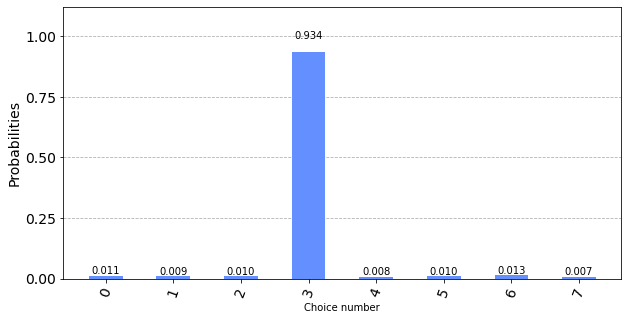

In [26]:
# Block 5 - Plotting the results of Grover's algorithm
# YOU DO NOT NEED TO FILL IN ANY CODE HERE - JUST EXECUTE THE BLOCK

# Extracting probabilities from the result of solving Grover
counts = result.circuit_results[0]
counts = counts.int_outcomes()

# Plotting probabilities 
# Don't worry about all the details of how the plot is made
# All the code after the first line just makes the plot look nice
plot = plot_histogram(counts,figsize=(10, 5))
ax = plot.gca()
xticks = []
ax.set_xlabel("Choice number")
display(plot)

### Question - What probabilities did you get, with iterations = 0? Does the result make sense?

Now that we have gotten all the code for running Grover's algorithm down, its time to have some fun! Let's play around with the code through the following activities:

### Activity 1 - Try changing the iterations parameter in Block 4. Test out `iterations = 1`, `2`, etc. For each value of iterations, you will have to run Block 5 again to see the new histogram. What changes do you observe? Do you see amplitude amplification? Does the right choice's amplitude get amplified?

You will notice that the probability of the correct choice increases as you increase the number of iterations! This is amplitude amplification in action.

### Activity 2 - Now, let's play around with the size of the problem. Change the value of `number_choices` you had used in block 1. Keep in mind that this number has to be a power of 2, otherwise the code will produce an error. Run blocks 2, 3, 4, and 5 again to see the result. 

### Can you find the optimal number of iterations needed when `number_choices = 8`? What happens if you exceed this optimal number? What about when `number_choices = 16`, or `32`, or `64`?

You will notice that if you exceed the optimal number of iterations, the probability of measuring the correct choice goes down! This is why there is an **optimal** number of iterations - at this number of iterations, the probability of successfully finding the right state is maximized. To find out why this optimal number of iterations exists, stick around for the optional content!

### Activity 3 - Let's see what the circuit for Grover's algorithm looks like. Run the block of code given below to visualize the circuit. Here, we are using the `transpile` function that we had introduced during optional content in lab a few weeks ago. This function expresses the circuit in terms of the gates specified by the `basis_gates` parameter. 

### Try playing around with the size of the problem (`number_choices`) and the number of iterations and see how the circuit scales. You will find that the circuit becomes really big even for `number_choices=16`!

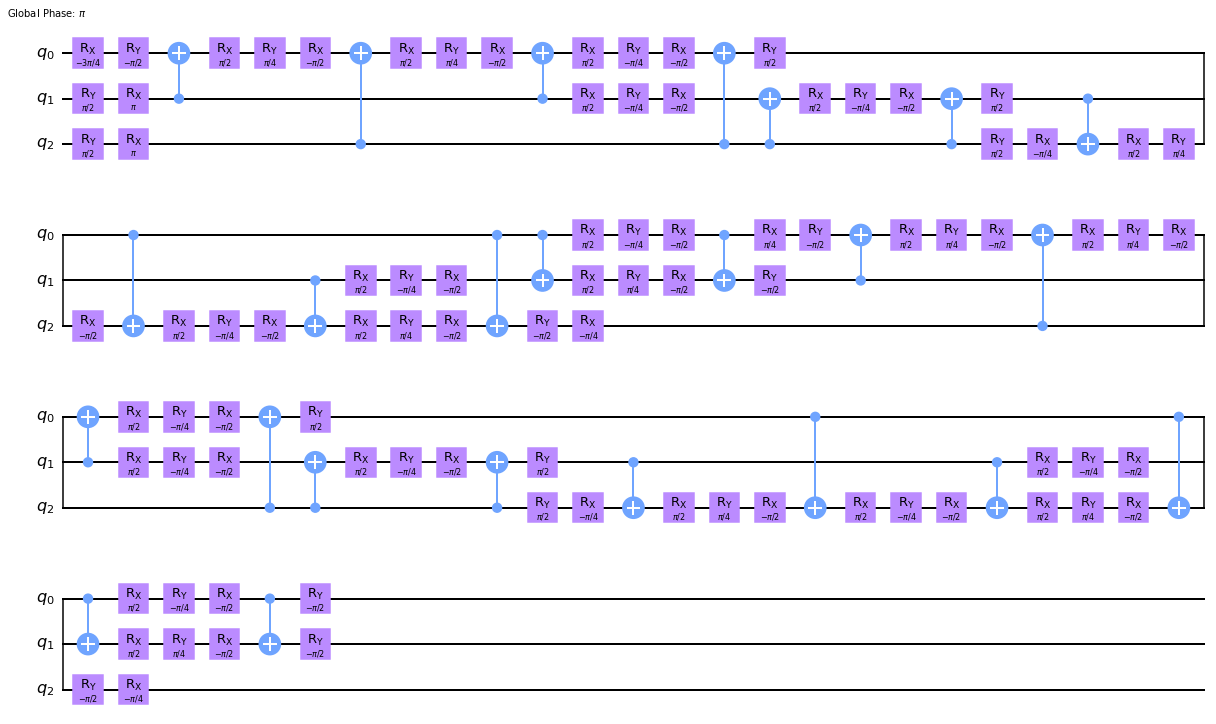

In [29]:
# Block 6 - Drawing the circuit for Grover's algorithm.
# Run this block of code to see the circuit.
qc = grover.construct_circuit(problem)
transp_qc = transpile(qc, basis_gates = ['rx','ry','cx'])
transp_qc.draw()


# Extra content - Understanding Amplitude Amplification Mathematically

Note - this extra content describes the math of amplitude amplification in more detail. If you are interested in this math, you will find this content helpful! Before you read this content, please refer to the optional content for this week's lab. This content will also help you answer some of the challenge problems from this week's homework.

This content is adapted from the Qiskit textbook chapter on Grover's algorithm.

Before looking at the list of items, we have no idea where the marked item is. Therefore, any guess of its location is as good as any other, which can be expressed in terms of a
uniform superposition: $|s \rangle = \frac{1}{\sqrt{N}} \sum_{x = 0}^{N -1} | x
\rangle.$

If at this point we were to measure in the standard basis $\{ | x \rangle \}$, this superposition would collapse, according to the fifth quantum law, to any one of the basis states with the same probability of $\frac{1}{N} = \frac{1}{2^n}$. Our chances of guessing the right value $w$ is therefore $1$ in $2^n$, as could be expected. Hence, on average we would need to try about $N/2 = 2^{n-1}$ times to guess the correct item.

Enter the procedure called **amplitude amplification**, which is how a quantum computer significantly enhances this probability. This procedure stretches out (amplifies) the amplitude of the marked item, which shrinks the other items' amplitude, so that measuring the final state will return the right item with near-certainty. 

This algorithm has a nice geometrical interpretation in terms of two reflections, which generate a rotation in a two-dimensional plane. The only two special states we need to consider are the winner $| w \rangle$ and the uniform superposition $| s \rangle$. These two vectors span a two-dimensional plane in the vector space $\mathbb{C}^N.$ They are not quite perpendicular because $| w \rangle$ occurs in the superposition with amplitude $N^{-1/2}$ as well.
We can, however, introduce an additional state $|s'\rangle$ that is in the span of these two vectors, which is perpendicular to $| w \rangle$ and is obtained from $|s \rangle$ by removing $| w \rangle$ and
rescaling. 

**Step 1**: The amplitude amplification procedure starts out in the uniform superposition $| s \rangle$, which is easily constructed from $| s \rangle = H^{\otimes n} | 0 \rangle^n$.

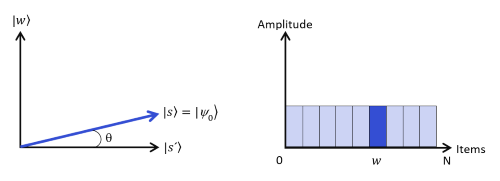

The left graphic corresponds to the two-dimensional plane spanned by perpendicular vectors $|w\rangle$ and $|s'\rangle$ which allows to express the initial state as $|s\rangle = \sin \theta | w \rangle + \cos \theta | s' \rangle,$ where $\theta = \arcsin \langle s | w \rangle = \arcsin \frac{1}{\sqrt{N}}$. The right graphic is a bar graph of the amplitudes of the state $| s \rangle$.

**Step 2**: We apply the oracle reflection $U_f$ to the state $|s\rangle$.

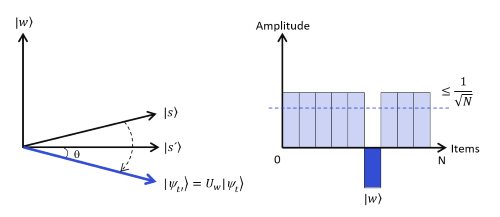

Geometrically this corresponds to a reflection of the state $|s\rangle$ about $|s'\rangle$. This transformation means that the amplitude in front of the $|w\rangle$ state becomes negative, which in turn means that the average amplitude (indicated by a dashed line) has been lowered.

**Step 3**: We now apply an additional reflection ($U_s$) about the state $|s\rangle$: $U_s = 2|s\rangle\langle s| - \mathbb{1}$. This transformation maps the state to $U_s U_f| s \rangle$ and completes the transformation. 

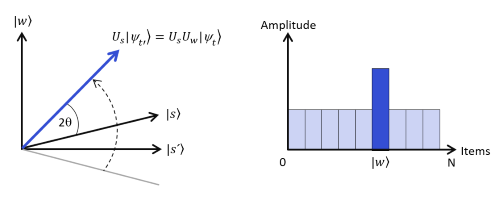

Two reflections always correspond to a rotation. The transformation $U_s U_f$ rotates the initial state $|s\rangle$ closer towards the winner $|w\rangle$. The action of the reflection $U_s$ in the amplitude bar diagram can be understood as a reflection about the average amplitude. Since the average amplitude has been lowered by the first reflection, this transformation boosts the negative amplitude of $|w\rangle$ to roughly three times its original value, while it decreases the other amplitudes. We then go to **step 2** to repeat the application. This procedure will be repeated several times to zero in on the winner. 

After $t$ steps we will be in the state $|\psi_t\rangle$ where: $| \psi_t \rangle = (U_s U_f)^t  | s \rangle.$

How many times do we need to apply the rotation? It turns out that roughly $\sqrt{N}$ rotations suffice. This becomes clear when looking at the amplitudes of the state $| \psi \rangle$. We can see that the amplitude of $| w \rangle$ grows linearly with the number of applications $\sim t N^{-1/2}$. However, since we are dealing with amplitudes and not probabilities, the vector space's dimension enters as a square root. Therefore it is the amplitude, and not just the probability, that is being amplified in this procedure.

In the case that there are multiple solutions, $M$, it can be shown that roughly $\sqrt{(N/M)}$ rotations will suffice.


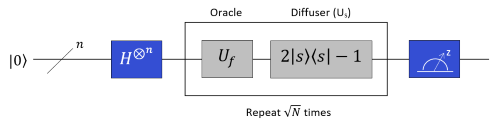